In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(
    "fcc-forum-pageviews.csv", 
    index_col="date",
    parse_dates=["date"])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]

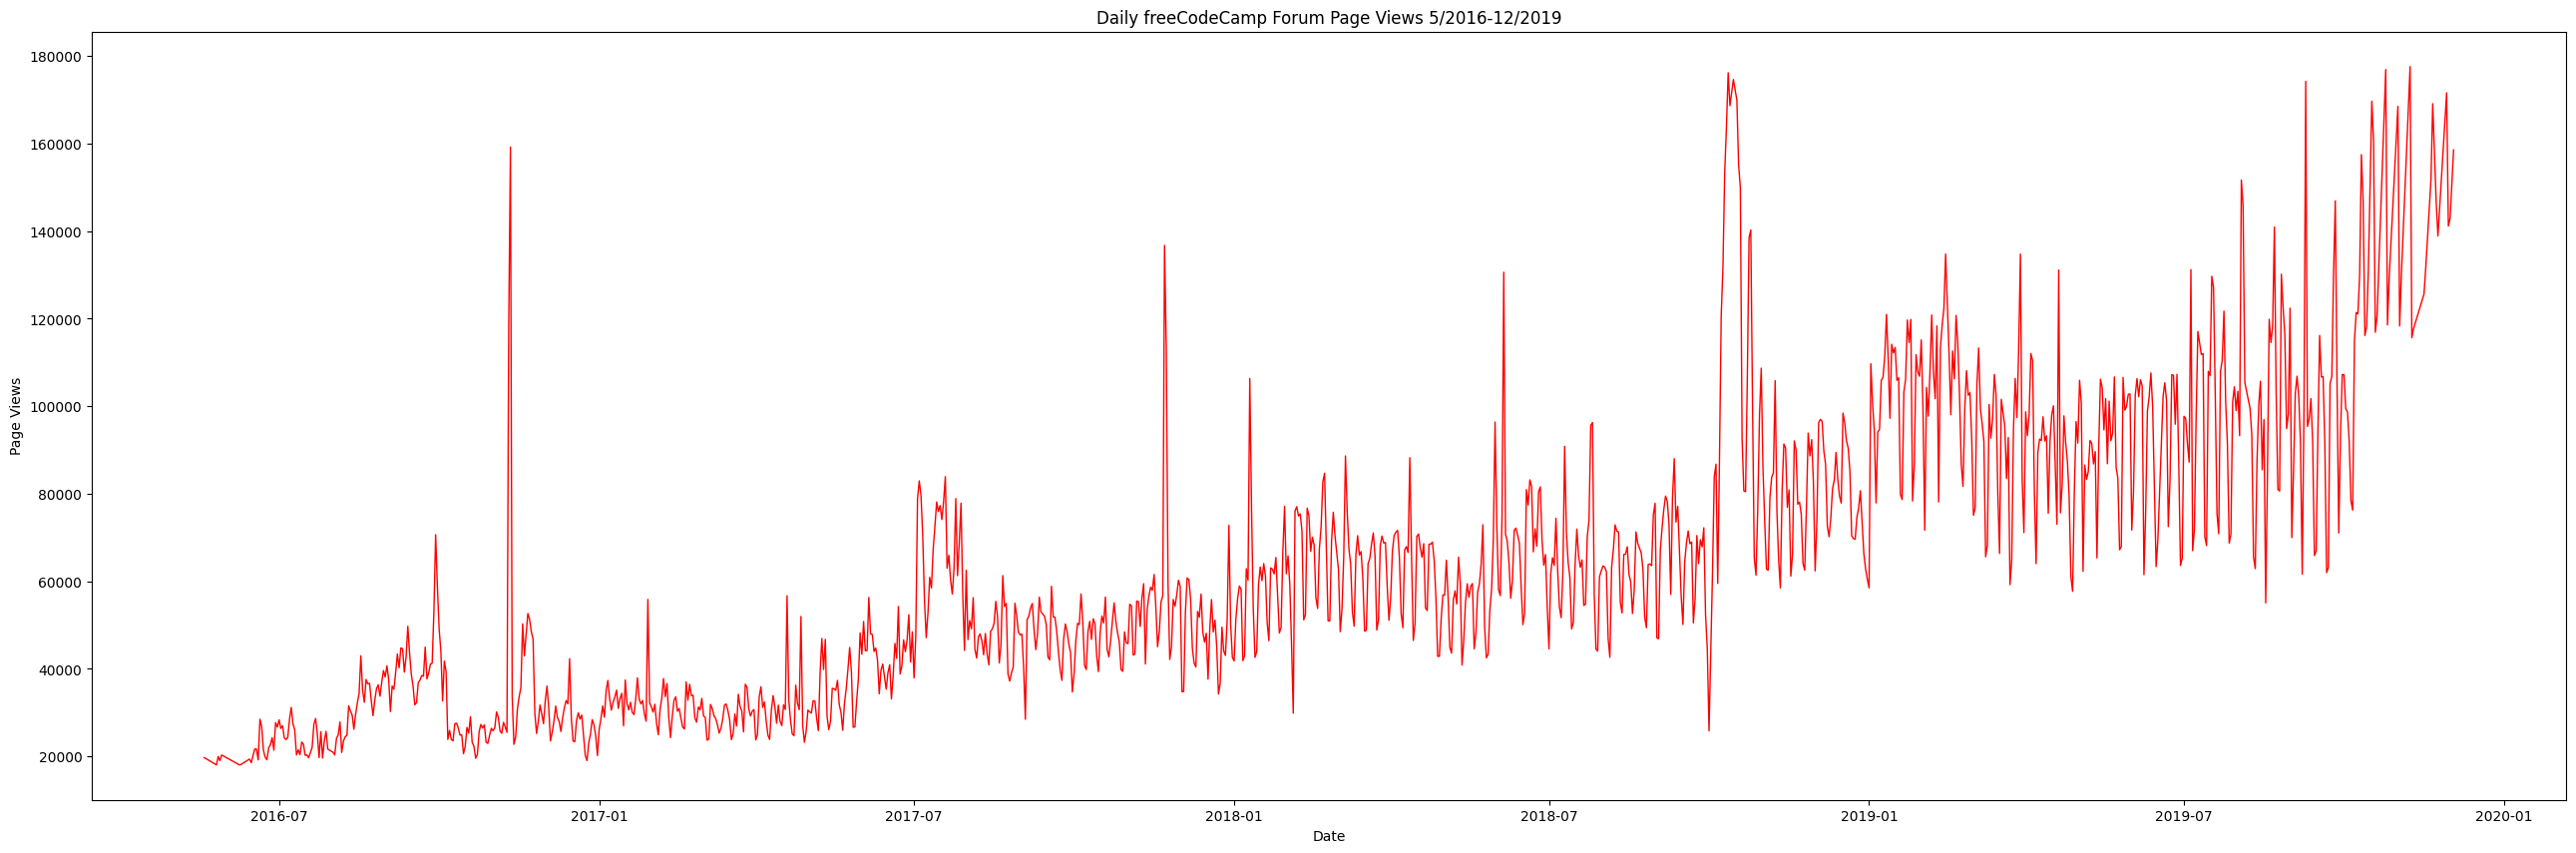

In [5]:
fig, ax = plt.subplots(figsize =(32, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.plot(df.index, df["value"], "r", linewidth=1)
plt.show()

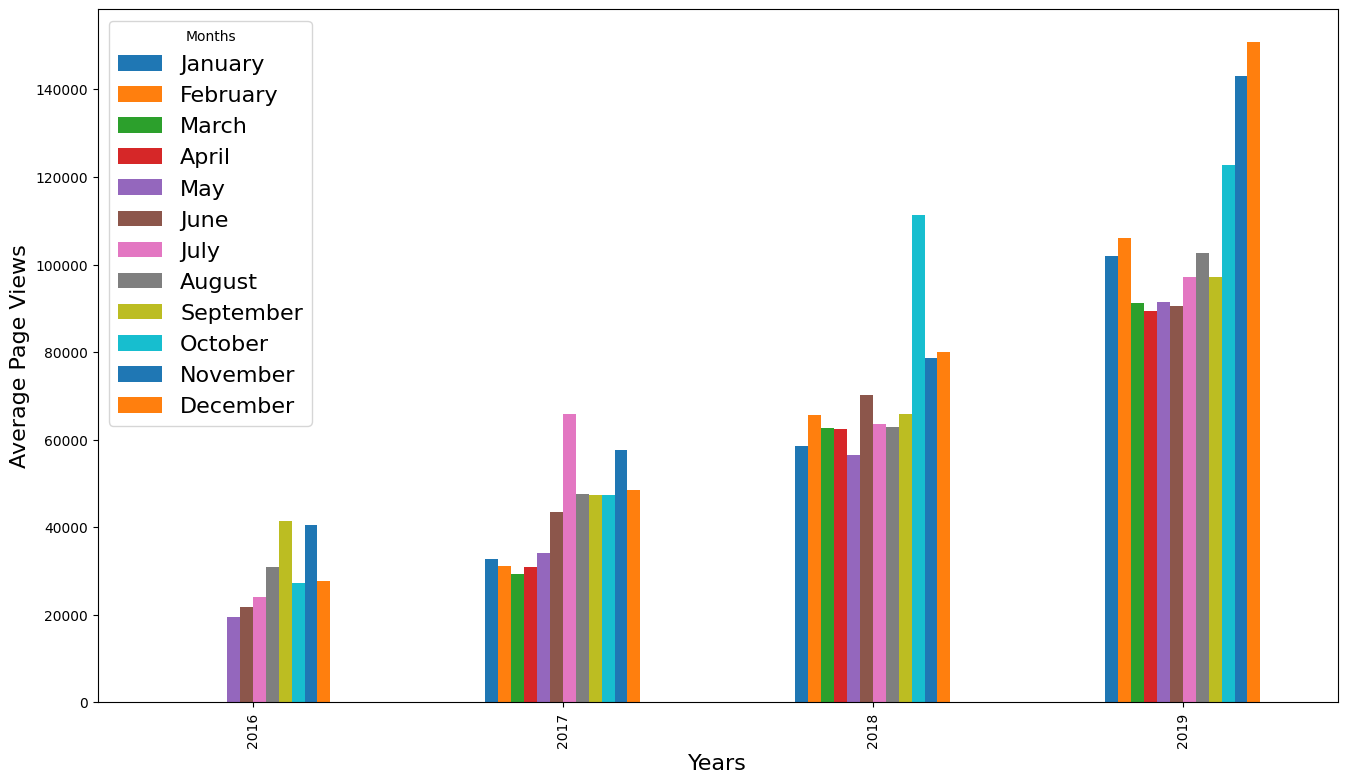

In [6]:
df_bar = df.copy()
df_bar["year"] = df_bar.index.year
df_bar["month"] = df_bar.index.month
df_bar = df_bar.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()
df_bar.columns =  [
    "January", "February", "March", "April", 
    "May", "June", "July", "August", 
    "September", "October", "November", "December"
]

fig = df_bar.plot(kind="bar", figsize=(16, 9)).figure
plt.xlabel("Years", fontsize=16)
plt.ylabel("Average Page Views", fontsize=16)
plt.legend(loc = "upper left", title = "Months", fontsize=16)


Text(0, 0.5, 'Page Views')

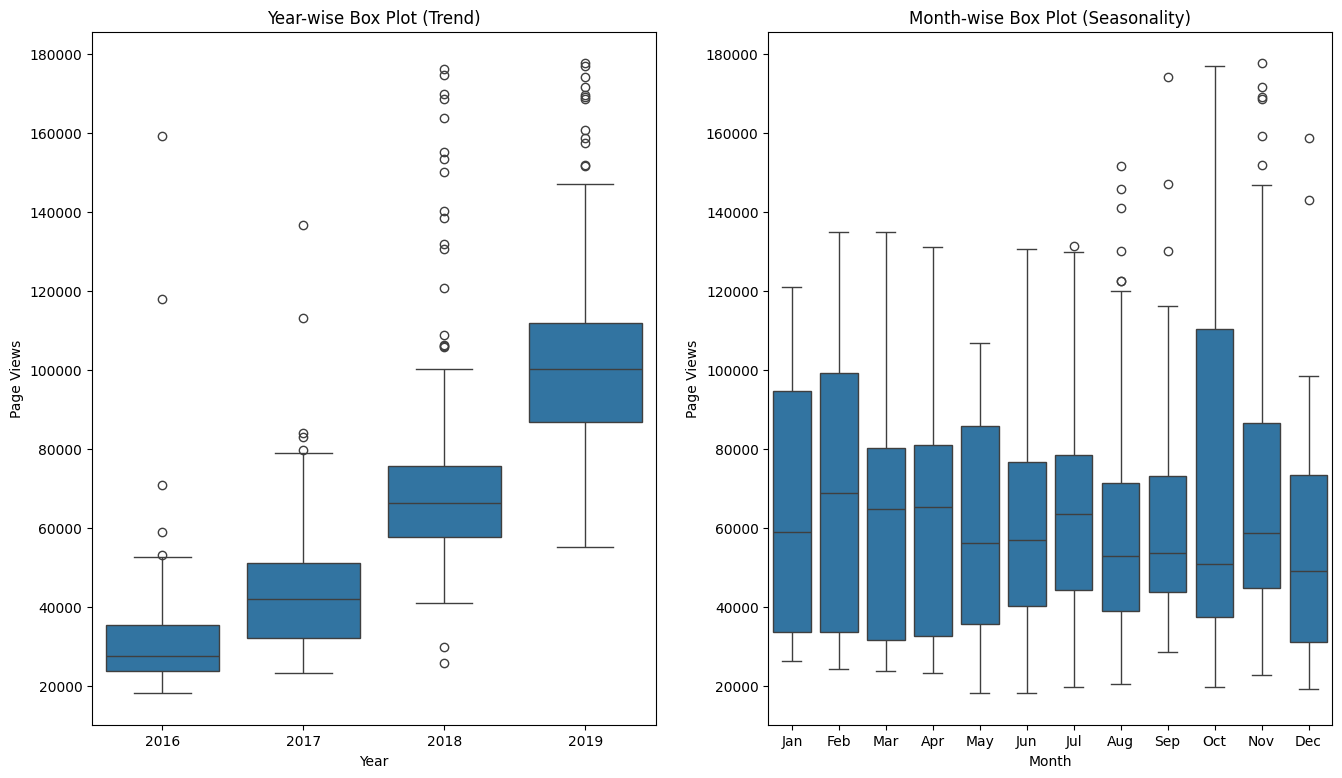

In [26]:
df_box = df.copy()
df_box.reset_index(inplace=True)

# Extract year and month from date column
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Sort DataFrame by month order
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

cat_order = list(df_box["month"].unique())

# Create figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

# Year-wise Box Plot (Trend) using Matplotlib

ax1 = sns.boxplot(x=df_box["year"].astype("category"), y=df_box["value"].astype('float'), ax=ax1, orient = "v")
ax2 = sns.boxplot(x=df_box["month"].astype("category"), y=df_box["value"].astype('float'), ax=ax2, orient = "v", order=cat_order)

ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")

# Month-wise Box Plot (Seasonality) using Matplotlib
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")

In [10]:
df_box["month_order"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_order")


In [24]:
cat_order = list(df_box["month"].unique())
cat_order

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [11]:
df_box.head()

,date,value,year,month,month_order
210,2017-01-06,37353,2017,Jan,1
593,2018-01-24,61700,2018,Jan,1
592,2018-01-23,62758,2018,Jan,1
572,2018-01-03,56013,2018,Jan,1
573,2018-01-04,58910,2018,Jan,1


In [8]:
len(ax1.lines) / 6

4.0